# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command prompts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Importing dataframe

In [3]:
# Creating path first
path = r'/Users/jaksdt/Desktop/Data analytics stuff/Data immersion/Exercises 1 - 10/Section 6'

In [4]:
# Importing dataframe
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'citibike3.csv'), index_col = False)

In [5]:
df

,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,zip_code
0,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,10018.0
1,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,10013.0
2,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,10019.0
3,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,10016.0
4,18024,Sat,18,2013-09-07 18:08:22,521,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1976,Unknown,10122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,17988,Sat,18,2013-09-21 18:39:20,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-21 20:08:59,478,11 Ave & W 41 St,40.760301,-73.998842,2697,Non-Subscriber,1976,Unknown,10019.0
49973,18458,Sat,17,2013-09-14 17:32:26,261,Johnson St & Gold St,40.694749,-73.983625,2013-09-14 17:52:17,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970,Female,11201.0
49974,15054,Sat,18,2013-09-07 18:08:21,402,Broadway & E 22 St,40.740343,-73.989551,2013-09-07 18:25:51,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961,Female,10010.0
49975,16763,Sat,13,2013-09-07 13:25:35,271,Ashland Pl & Hanson Pl,40.685282,-73.978058,2013-09-07 14:14:04,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2697,Non-Subscriber,1976,Unknown,11215.0


## Cleaning and wrangling had been done in the previous exercises

/var/folders/rt/5l65ws1n3191wh72d_rd0k2r0000gn/T/ipykernel_4342/3491099618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_duration'], bins=60)


<Axes: xlabel='trip_duration', ylabel='Density'>

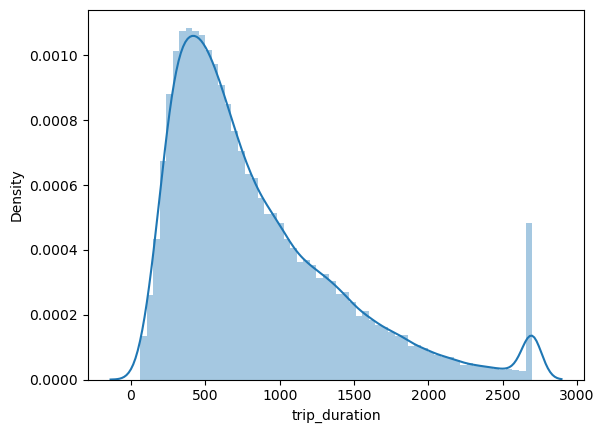

In [6]:
# Checking for extreme values
sns.distplot(df['trip_duration'], bins=60)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bike_id                  49977 non-null  int64  
 1   weekday                  49977 non-null  object 
 2   start_hour               49977 non-null  int64  
 3   start_time               49977 non-null  object 
 4   start_station_id         49977 non-null  int64  
 5   start_station_name       49977 non-null  object 
 6   start_station_latitude   49977 non-null  float64
 7   start_station_longitude  49977 non-null  float64
 8   end_time                 49977 non-null  object 
 9   end_station_id           49977 non-null  int64  
 10  end_station_name         49977 non-null  object 
 11  end_station_latitude     49977 non-null  float64
 12  end_station_longitude    49977 non-null  float64
 13  trip_duration            49977 non-null  int64  
 14  subscriber            

In [8]:
# Changing start_time column from string to datetime
df['start_time'] = df['start_time'].astype('datetime64[ns]')

In [9]:
# Changing end_time column from string to datetime
df['end_time'] = df['end_time'].astype('datetime64[ns]')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   bike_id                  49977 non-null  int64         
 1   weekday                  49977 non-null  object        
 2   start_hour               49977 non-null  int64         
 3   start_time               49977 non-null  datetime64[ns]
 4   start_station_id         49977 non-null  int64         
 5   start_station_name       49977 non-null  object        
 6   start_station_latitude   49977 non-null  float64       
 7   start_station_longitude  49977 non-null  float64       
 8   end_time                 49977 non-null  datetime64[ns]
 9   end_station_id           49977 non-null  int64         
 10  end_station_name         49977 non-null  object        
 11  end_station_latitude     49977 non-null  float64       
 12  end_station_longitude    49977 n

In [11]:
# Checking the amount of rides per hour each day
hour_counts = df.groupby(['start_hour',df['start_time'].dt.date])['start_time'].count()

In [12]:
hour_counts

start_hour  start_time
0           2013-09-01    21
            2013-09-02    26
            2013-09-03     7
            2013-09-04    11
            2013-09-05    19
                          ..
23          2013-09-26    42
            2013-09-27    47
            2013-09-28    55
            2013-09-29    22
            2013-09-30    19
Name: start_time, Length: 713, dtype: int64

In [13]:
# Checking average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [14]:
avg_rides_per_hour

,start_hour,start_time
0,0,17.400000
1,1,11.000000
2,2,6.466667
3,3,4.615385
4,4,3.296296
5,5,6.933333
6,6,30.366667
7,7,67.900000
8,8,109.433333
9,9,93.700000


In [15]:
# Checking rides per day
day_counts = df.groupby('weekday')['start_time'].count().reset_index()

In [16]:
day_counts

,weekday,start_time
0,Fri,7308
1,Mon,7712
2,Sat,6507
3,Sun,7315
4,Thu,6849
5,Tue,7062
6,Wed,7224


In [17]:
# Checking the mean
df['trip_duration'].mean()

838.8776237069052

In [18]:
# Checking the median
df['trip_duration'].median()

672.0

In [19]:
# Checking the max
df['trip_duration'].max()

2697

In [20]:
# Checking the min
df['trip_duration'].min()

60

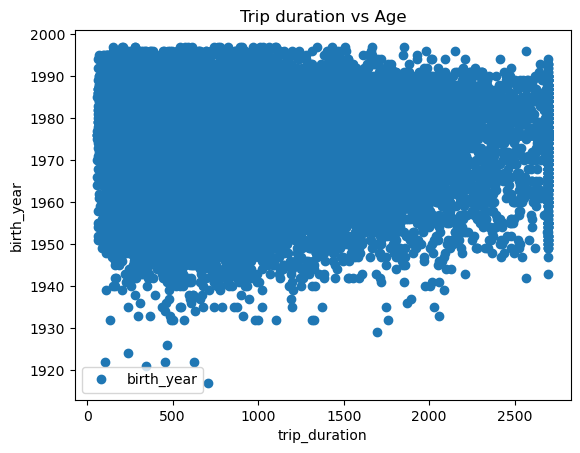

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'trip_duration', y='birth_year',style='o')
plt.title('Trip duration vs Age')  
plt.xlabel('trip_duration')  
plt.ylabel('birth_year')  
plt.show()

### There are too many data points, but we can make out some sort of pattern. It looks like a slight upward trend, showing that the oldest people never took trips that lasted longer than 750 seconds.

## Hypothesis: The younger people are, the longer their trips will be.

In [27]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['trip_duration'].values.reshape(-1,1)
y = df['birth_year'].values.reshape(-1,1)

In [32]:
X

array([[ 993],
       [ 581],
       [ 361],
       ...,
       [1050],
       [2697],
       [ 370]])

In [29]:
y

array([[1968],
       [1983],
       [1989],
       ...,
       [1961],
       [1976],
       [1980]])

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [34]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

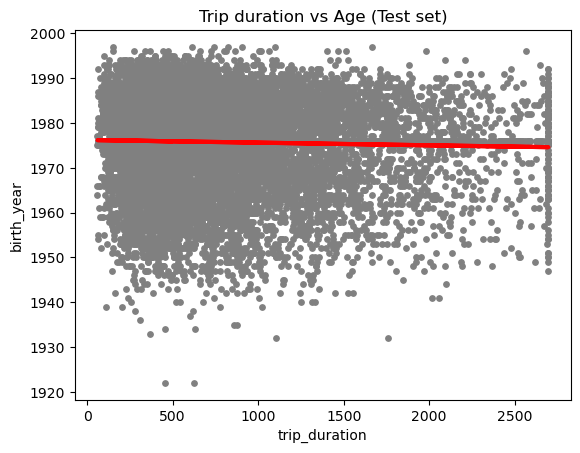

In [39]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Trip duration vs Age (Test set)')
plot_test.xlabel('trip_duration')
plot_test.ylabel('birth_year')
plot_test.show()

### Contrary to my hypothesis, the regression line appears to be sloping very slightly downwards. I assume it's because of the mass amount of data points in the very beginning that brough the ave up.

In [40]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [41]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0005949]]
Mean squared error:  101.85961366698008
R2 score:  0.0014964831874325624


In [42]:
y_predicted

array([[1975.90642162],
       [1975.99625161],
       [1975.78149249],
       ...,
       [1975.68214409],
       [1975.87251228],
       [1976.05276716]])

In [43]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1978,1975.906422
1,1985,1975.996252
2,1961,1975.781492
3,1968,1975.787441
4,1980,1975.663702
5,1952,1975.907017
6,1967,1975.863589
7,1976,1975.242513
8,1985,1975.538773
9,1982,1975.962937


### There is a lot of difference between the actual and the predicted values. This means that my model is not doing a great job explaining the the relationship between the variables. But I think that's because the dataframe was not the best to begin with. It's something we spoke about already.

### Possible bias could be that the rides were not recorded acurately. Rides were also recorded in seconds, increasing the chance for error.

### Compare how the regression fits the training set

In [44]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.0005949]]
Mean squared error:  103.6590391387525
R2 score:  0.0011224654361491337


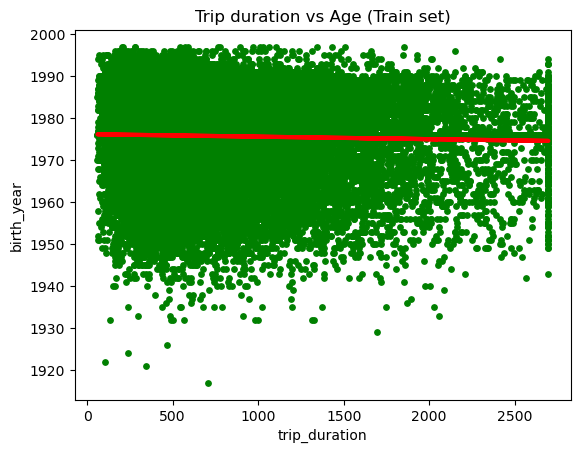

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Trip duration vs Age (Train set)')
plot_test.xlabel('trip_duration')
plot_test.ylabel('birth_year')
plot_test.show()

### These results look similar to the test results.